In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display,HTML

import warnings
warnings.filterwarnings('ignore')

## Импорт и предварительная обработка данных

In [2]:
# Создаем датафрейм на основе данных из csv-файла
#crm_data = pd.read_csv("Карьерный цех\2 этап\all_data\crm_data.csv",sep=";",index_col="Unnamed: 0")
crm_data = pd.read_csv("all_data\\crm_data.csv",sep=";",encoding="windows-1251")
direct_data = pd.read_csv("all_data\\direct_data.csv",sep=";",encoding="windows-1251")
facebook_data = pd.read_csv("all_data\\facebook_data.csv",sep=";",encoding="windows-1251")
GA_data = pd.read_csv("all_data\\GA_data.csv",sep=";",encoding="windows-1251")
GoogleAds_data = pd.read_csv("all_data\\GoogleAds_data.csv",sep=";",encoding="windows-1251")
test_users = pd.read_csv("all_data\\test_users.csv",sep=";",encoding="windows-1251")

In [3]:
crm_data.head(3)

,IdPolzovatelja,StatusZakaza,DataSozdanijaZakaza,DataIzmenenijaZakaza,ZakazOplachen,DataOplaty,ZakazOtmenen,DataOtmenyZakaza,IdSluzhbyDostavki,IdPlatezhnojSistemy,Source,Medium,Campaign,GoogleClientId,Summa,Amount
0,102081,Заказ оформлен,01.10.2020 0:39:54,01.10.2020 15:33:47,False,NaN,True,01.10.2020 15:33:46,5187,17,yandex,cpc,CampaignName_13,8.376961e+07,NaN,5
1,119893,Заказ оформлен,01.10.2020 0:55:38,12.10.2020 15:09:07,False,NaN,True,04.10.2020 0:00:11,5187,17,blogger,stories,BloggerCampaignName_798,1.020073e+09,NaN,5
2,119894,Выполнен,01.10.2020 1:04:52,07.10.2020 15:59:51,True,01.10.2020 1:06:17,False,NaN,5193,17,ig,community,CommunityPost_16,7.474072e+08,"3 426,57 ?",2


In [4]:
# Приведение столбца с суммами к числовому формату в crm_data
crm_data['Summa'] = crm_data['Summa'].str.replace('?','')
crm_data['Summa'] = crm_data['Summa'].str.replace(' ','')
crm_data['Summa'] = crm_data['Summa'].str.replace(',','.')
crm_data['Summa']=crm_data['Summa'].astype(float)

In [5]:
# Приведение столбцы с датой в crm_data к формауту datetime
crm_data['DataSozdanijaZakaza'] = (pd.to_datetime(crm_data['DataSozdanijaZakaza'],format = '%d.%m.%Y %H:%M:%S'))
crm_data['DataIzmenenijaZakaza'] = (pd.to_datetime(crm_data['DataIzmenenijaZakaza'],format = '%d.%m.%Y %H:%M:%S'))
crm_data['DataOtmenyZakaza'] = (pd.to_datetime(crm_data['DataOtmenyZakaza'],format = '%d.%m.%Y %H:%M:%S'))
crm_data['DataOplaty'] = (pd.to_datetime(crm_data['DataOplaty'],format = '%d.%m.%Y %H:%M:%S'))

In [10]:
crm_data.head(3)

,IdPolzovatelja,StatusZakaza,DataSozdanijaZakaza,DataIzmenenijaZakaza,ZakazOplachen,DataOplaty,ZakazOtmenen,DataOtmenyZakaza,IdSluzhbyDostavki,IdPlatezhnojSistemy,Source,Medium,Campaign,GoogleClientId,Summa,Amount
0,102081,Заказ оформлен,2020-10-01 00:39:54,2020-10-01 15:33:47,False,NaT,True,2020-10-01 15:33:46,5187,17,yandex,cpc,CampaignName_13,8.376961e+07,NaN,5
1,119893,Заказ оформлен,2020-10-01 00:55:38,2020-10-12 15:09:07,False,NaT,True,2020-10-04 00:00:11,5187,17,blogger,stories,BloggerCampaignName_798,1.020073e+09,NaN,5
2,119894,Выполнен,2020-10-01 01:04:52,2020-10-07 15:59:51,True,2020-10-01 01:06:17,False,NaT,5193,17,ig,community,CommunityPost_16,7.474072e+08,3426.57,2


In [11]:
crm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22291 entries, 0 to 22290
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   IdPolzovatelja        22291 non-null  int64         
 1   StatusZakaza          22291 non-null  object        
 2   DataSozdanijaZakaza   22291 non-null  datetime64[ns]
 3   DataIzmenenijaZakaza  22291 non-null  datetime64[ns]
 4   ZakazOplachen         22291 non-null  bool          
 5   DataOplaty            13831 non-null  datetime64[ns]
 6   ZakazOtmenen          22291 non-null  bool          
 7   DataOtmenyZakaza      6565 non-null   datetime64[ns]
 8   IdSluzhbyDostavki     22291 non-null  int64         
 9   IdPlatezhnojSistemy   22291 non-null  int64         
 10  Source                18711 non-null  object        
 11  Medium                18711 non-null  object        
 12  Campaign              17991 non-null  object        
 13  GoogleClientId  

In [7]:
# Работа с типами данных в direct_data
direct_data['Date'] = (pd.to_datetime(direct_data['Date'],format = '%d.%m.%Y'))

direct_data['Clicks'] = direct_data['Clicks'].str.replace(',','.')
direct_data['Clicks'] = direct_data['Clicks'].astype(float)

direct_data['Shows'] = direct_data['Shows'].str.replace(',','.')
direct_data['Shows'] = direct_data['Shows'].astype(float)

direct_data['Budget'] = direct_data['Budget'].str.replace(',','.')
direct_data['Budget'] = direct_data['Budget'].astype(float)

In [8]:
direct_data.head(3)

,Date,CampaignId,DeviceTypeId,CampaignName,Clicks,Shows,Budget,CampaignType,AdNetworkType
0,2020-10-01,50354385,1,CampaignName_13,2.0,6.0,28.694,TEXT_CAMPAIGN,SEARCH
1,2020-10-01,50354385,1,CampaignName_13,1.0,4.0,25.154,TEXT_CAMPAIGN,SEARCH
2,2020-10-01,50354385,1,CampaignName_13,1.0,1.0,35.004,TEXT_CAMPAIGN,SEARCH


In [9]:
# Работа с типами данных в facebook_data
facebook_data['Date'] = (pd.to_datetime(facebook_data['Date'],format = '%d.%m.%Y'))

facebook_data['Clicks'] = facebook_data['Clicks'].str.replace(',','.')
facebook_data['Clicks'] = facebook_data['Clicks'].astype(float)

facebook_data['Shows'] = facebook_data['Shows'].str.replace(',','.')
facebook_data['Shows'] = facebook_data['Shows'].astype(float)

facebook_data['Budget'] = facebook_data['Budget'].str.replace(',','.')
facebook_data['Budget'] = facebook_data['Budget'].astype(float)

In [213]:
facebook_data.head(3)

,Date,CampaignId,CampaignName,AdSetId,AdsetName,AdId,AdName,DeviceTypeId,Clicks,Shows,Budget,JActions
0,2020-10-01,23845631149110291,CampaignName_90,23845631149060291,AdsetName_2,23845631149030291,AdName_4,2,25.0,34719.0,454.329,"[\n {\n ""action_type"": ""landing_page_view""..."
1,2020-10-01,23845631149110291,CampaignName_90,23845631149060291,AdsetName_2,23845631149030291,AdName_4,3,0.0,162.0,1.558,"[\n {\n ""action_type"": ""video_view"",\n ..."
2,2020-10-01,23845631149110291,CampaignName_90,23845631149060291,AdsetName_2,23845631149030291,AdName_4,3,0.0,47.0,0.672,"[\n {\n ""action_type"": ""video_view"",\n ..."


In [214]:
# Работа с типами данных в GA_data
GA_data['DateTime'] = (pd.to_datetime(GA_data['DateTime'],format = '%d.%m.%Y %H:%M:%S'))
GA_data['DateTime']=GA_data['DateTime'].apply(lambda x: x.date())

In [215]:
GA_data.head(3)

,DateTime,ClientId,SessionCount,Sessions,Source,Medium,Campaign,Content,DeviceCategory,Цель GA — Добавить в корзину,Цель GA — Кнопка перехода в корзину после кнопки Заказать,Цель GA — Кнопка завершения оформления заказа в корзине,Цель GA — Успешная оплата заказа,Цель GA — Финал заказ подтвержден
0,2020-10-01,1.96284e+09,1,1,blogger,stories,BloggerCampaignName_153,NaN,mobile,0,1,0,0,0
1,2020-10-01,1.29928e+09,1,1,tiktok,community,CommunityPost_226,NaN,mobile,0,0,0,0,0
2,2020-10-01,8.01062e+08,48,1,yahoo,organic,(not set),NaN,mobile,0,0,1,0,0


In [216]:
GoogleAds_data.head(3)

,Date,DeviceTypeId,CampaignId,CampaignName,Clicks,Shows,Cost,QualityScore,AdNetworkType2
0,01.10.2020,2,9305360355,CampaignName_3,"3,0","6,0","67,342",8.0,Google search
1,01.10.2020,2,9305360355,CampaignName_3,"3,0","16,0","39,254",8.0,Google search
2,01.10.2020,2,9305360355,CampaignName_3,"0,0","3,0","0,0",8.0,Google search


In [217]:
# Работа с типами данных в GoogleAds_data
GoogleAds_data['Date'] = (pd.to_datetime(GoogleAds_data['Date'],format = '%d.%m.%Y'))

GoogleAds_data['Clicks'] = GoogleAds_data['Clicks'].str.replace(',','.')
GoogleAds_data['Clicks'] = GoogleAds_data['Clicks'].astype(float)

GoogleAds_data['Shows'] = GoogleAds_data['Shows'].str.replace(',','.')
GoogleAds_data['Shows'] = GoogleAds_data['Shows'].astype(float)

GoogleAds_data['Cost'] = GoogleAds_data['Cost'].str.replace(',','.')
GoogleAds_data['Cost'] = GoogleAds_data['Cost'].astype(float)

In [221]:
GoogleAds_data.head(3)

,Date,DeviceTypeId,CampaignId,CampaignName,Clicks,Shows,Cost,QualityScore,AdNetworkType2
0,2020-10-01,2,9305360355,CampaignName_3,3.0,6.0,67.342,8.0,Google search
1,2020-10-01,2,9305360355,CampaignName_3,3.0,16.0,39.254,8.0,Google search
2,2020-10-01,2,9305360355,CampaignName_3,0.0,3.0,0.000,8.0,Google search


In [224]:
# Временной срез по заказам и рекламе, проверка, что все в указанных временных диапазонах
print(crm_data['DataSozdanijaZakaza'].min(), '--', crm_data['DataSozdanijaZakaza'].max())
print(direct_data['Date'].min(),'--',direct_data['Date'].max())
print(facebook_data['Date'].min(), '--', facebook_data['Date'].max())
print(GoogleAds_data['Date'].min(), '--', GoogleAds_data['Date'].max())
print(GA_data['DateTime'].min(),'--', GA_data['DateTime'].max())

2020-10-01 00:39:54 -- 2020-12-31 23:30:30
2020-10-01 00:00:00 -- 2020-12-31 00:00:00
2020-10-01 00:00:00 -- 2020-12-16 00:00:00
2020-10-01 00:00:00 -- 2020-12-31 00:00:00
2020-10-01 -- 2020-12-31


In [225]:
crm_data.describe(datetime_is_numeric=True, include='all')

,IdPolzovatelja,StatusZakaza,DataSozdanijaZakaza,DataIzmenenijaZakaza,ZakazOplachen,DataOplaty,ZakazOtmenen,DataOtmenyZakaza,IdSluzhbyDostavki,IdPlatezhnojSistemy,Source,Medium,Campaign,GoogleClientId,Summa,Amount
count,22291.000000,22291,22291,22291,22291,13831,22291,6565,22291.000000,22291.000000,18711,18711,17991,2.200100e+04,13584.000000,22291.000000
unique,NaN,11,NaN,NaN,2,NaN,2,NaN,NaN,NaN,23,9,707,NaN,NaN,NaN
top,NaN,Выполнен,NaN,NaN,True,NaN,False,NaN,NaN,NaN,blogger,stories,CommunityPost_16,NaN,NaN,NaN
freq,NaN,14209,NaN,NaN,13581,NaN,15777,NaN,NaN,NaN,11685,11632,995,NaN,NaN,NaN
mean,118531.349513,NaN,2020-11-18 13:33:45.502046208,2020-12-03 08:46:16.960564992,NaN,2020-11-25 10:13:54.862040320,NaN,2020-11-25 13:06:46.576539392,5192.549056,11.350366,NaN,NaN,NaN,1.069790e+09,7881.905198,3.788704
min,2.000000,NaN,2020-10-01 00:39:54,2020-10-01 14:40:42,NaN,2020-10-01 01:06:17,NaN,2020-10-01 14:40:41,5175.000000,1.000000,NaN,NaN,NaN,1.145872e+05,536.130000,1.000000
25%,120354.000000,NaN,2020-10-27 12:41:09,2020-11-07 10:01:11.500000,NaN,2020-11-04 07:24:19,NaN,2020-10-29 00:02:46,5192.000000,1.000000,NaN,NaN,NaN,5.334950e+08,6961.920000,3.000000
50%,125065.000000,NaN,2020-11-23 19:15:24,2020-12-03 11:26:27,NaN,2020-11-26 13:28:23,NaN,2020-11-28 18:55:59,5193.000000,17.000000,NaN,NaN,NaN,1.091969e+09,7738.920000,4.000000
75%,130056.000000,NaN,2020-12-12 01:50:22.500000,2020-12-21 21:51:14,NaN,2020-12-15 19:15:38.500000,NaN,2020-12-18 00:01:38,5196.000000,17.000000,NaN,NaN,NaN,1.587479e+09,8205.120000,4.000000
max,135685.000000,NaN,2020-12-31 23:30:30,2021-10-06 10:25:33,NaN,2021-06-30 18:09:11,NaN,2021-08-11 11:58:49,5198.000000,17.000000,NaN,NaN,NaN,2.147187e+09,78943.200000,17.000000


## Первичный анализ данных

#### Удаляем все заказы от тестовых пользователей и тестовых источников продвижения

In [226]:
test_users_list=[]
test_users_list = test_users['IdPolzovatelja']

crm_data_clear = crm_data[~crm_data.IdPolzovatelja.isin(test_users_list)]
crm_data_clear = crm_data_clear.drop(crm_data_clear[(crm_data_clear['Medium'] == 'test')].index).reset_index()

#### Распределение кол-ва успешных/отмененных заказов по каналам перехода

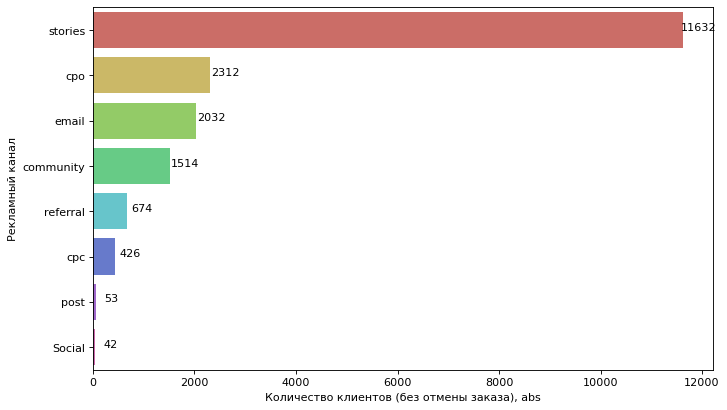

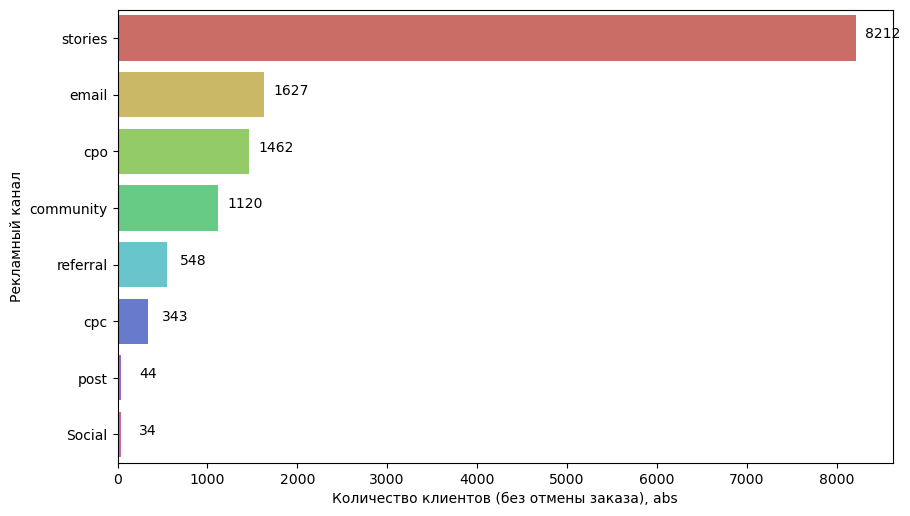

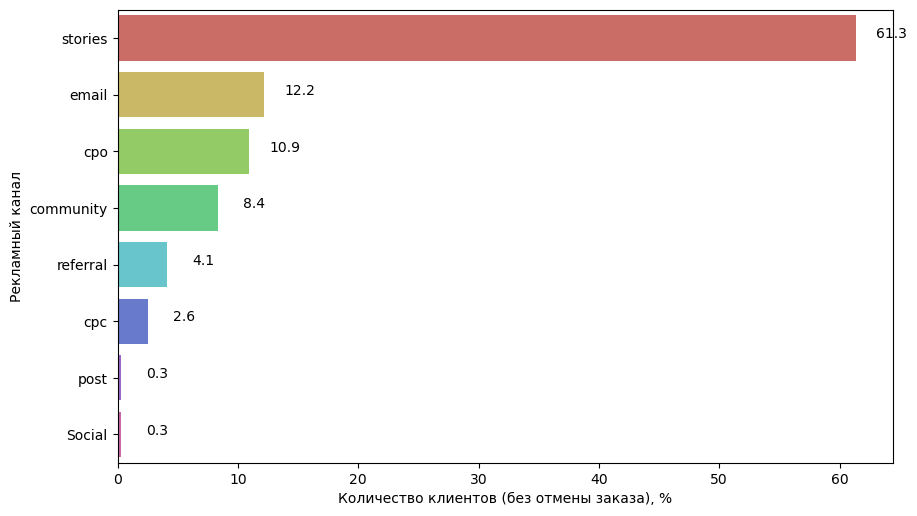

In [227]:
crm_data_clear_groups = crm_data_clear.groupby('Medium').agg({'IdPolzovatelja': np.count_nonzero}).sort_values(by='IdPolzovatelja', ascending=False).reset_index()
crm_data_clear_groups['Sum']=crm_data_clear_groups['IdPolzovatelja']/crm_data_clear_groups['IdPolzovatelja'].sum()
crm_data_clear_groups['Sum'] = (crm_data_clear_groups['Sum'] * 100)#.astype(str) + '%'

#crm_data_clear_groups_count = crm_data_clear_groups.groupby('one').count().reset_index()

ax=[]
ax=crm_data_clear_groups['IdPolzovatelja']

plt.figure(figsize=(10,6), frameon=False, dpi=80)
p = sns.barplot(x='IdPolzovatelja',y='Medium',data=crm_data_clear_groups, palette='hls',orient='h')
p.set_ylabel('Рекламный канал')
p.set_xlabel('Количество клиентов (без отмены заказа), abs')

for i in range(len(crm_data_clear_groups)):
    p.text(ax[i]+300,i,round(ax[i],1),color="black",ha="center")
plt.show()

crm_data_clear_groups = crm_data_clear[(crm_data_clear['ZakazOtmenen'] == 0)].groupby('Medium').agg({'IdPolzovatelja': np.count_nonzero}).sort_values(by='IdPolzovatelja', ascending=False).reset_index()
crm_data_clear_groups['Sum']=crm_data_clear_groups['IdPolzovatelja']/crm_data_clear_groups['IdPolzovatelja'].sum()
crm_data_clear_groups['Sum'] = (crm_data_clear_groups['Sum'] * 100)#.astype(str) + '%'

#crm_data_clear_groups_count = crm_data_clear_groups.groupby('one').count().reset_index()

ax=[]
ax=crm_data_clear_groups['IdPolzovatelja']

plt.figure(figsize=(10,6), frameon=False, dpi=100)
p = sns.barplot(x='IdPolzovatelja',y='Medium',data=crm_data_clear_groups, palette='hls',orient='h')
p.set_ylabel('Рекламный канал')
p.set_xlabel('Количество клиентов (без отмены заказа), abs')

for i in range(len(crm_data_clear_groups)):
    p.text(ax[i]+300,i,round(ax[i],1),color="black",ha="center")
plt.show()

ax=[]
ax=crm_data_clear_groups['Sum']

plt.figure(figsize=(10,6), frameon=False, dpi=100)
p2 = sns.barplot(x='Sum',y='Medium',data=crm_data_clear_groups, palette='hls',orient='h')
p2.set_ylabel('Рекламный канал')
p2.set_xlabel('Количество клиентов (без отмены заказа), %')

for i in range(len(crm_data_clear_groups)):
    p2.text(ax[i]+3,i,round(ax[i],1),color="black",ha="center")
plt.show()

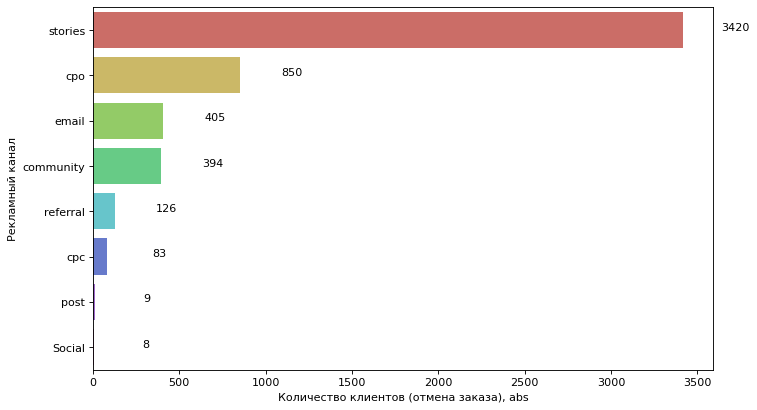

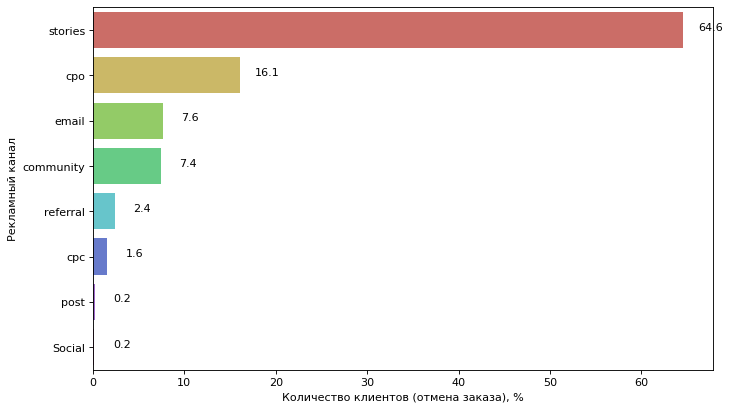

In [228]:
crm_data_clear_groups2 = crm_data_clear[(crm_data_clear['ZakazOtmenen'] == 1)].groupby('Medium').agg({'IdPolzovatelja': np.count_nonzero}).sort_values(by='IdPolzovatelja', ascending=False).reset_index()
crm_data_clear_groups2['Sum']=crm_data_clear_groups2['IdPolzovatelja']/crm_data_clear_groups2['IdPolzovatelja'].sum()
crm_data_clear_groups2['Sum'] = (crm_data_clear_groups2['Sum'] * 100)#.astype(str) + '%'
#crm_data_clear_groups_count = crm_data_clear_groups.groupby('one').count().reset_index()

ax=[]
ax=crm_data_clear_groups2['IdPolzovatelja']

plt.figure(figsize=(10,6), frameon=False, dpi=80)
p = sns.barplot(x='IdPolzovatelja',y='Medium',data=crm_data_clear_groups2, palette='hls',orient='h')
p.set_ylabel('Рекламный канал')
p.set_xlabel('Количество клиентов (отмена заказа), abs')

for i in range(len(crm_data_clear_groups2)):
    p.text(ax[i]+300,i,round(ax[i],1),color="black",ha="center")
plt.show()

ax=[]
ax=crm_data_clear_groups2['Sum']

plt.figure(figsize=(10,6), frameon=False, dpi=80)
p2 = sns.barplot(x='Sum',y='Medium',data=crm_data_clear_groups2, palette='hls',orient='h')
p2.set_ylabel('Рекламный канал')
p2.set_xlabel('Количество клиентов (отмена заказа), %')

for i in range(len(crm_data_clear_groups2)):
    p2.text(ax[i]+3,i,round(ax[i],1),color="black",ha="center")
plt.show()

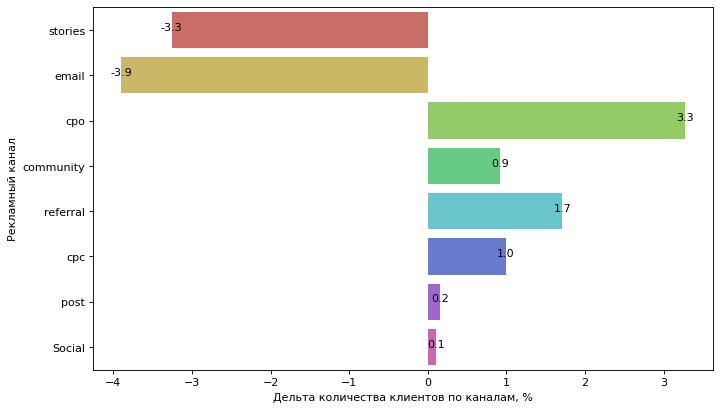

In [229]:
ax=[]
ax=crm_data_clear_groups['Sum']-crm_data_clear_groups2['Sum']
crm_data_clear_groups['delta']=crm_data_clear_groups['Sum']-crm_data_clear_groups2['Sum']

plt.figure(figsize=(10,6), frameon=False, dpi=80)
p2 = sns.barplot(x='delta',y='Medium',data=crm_data_clear_groups, palette='hls',orient='h')
p2.set_ylabel('Рекламный канал')
p2.set_xlabel('Дельта количества клиентов по каналам, %')

for i in range(len(crm_data_clear_groups)):
    p2.text(ax[i],i,round(ax[i],1),color="black",ha="center")
plt.show()

### При сравнении размера групп отновительно общей совокупности (%), можно сказать, что отменяют заказ чаще те клиенты, которые пришли через каналы "stories" и "email", хоть данные каналы и являются основным источником заказов (реклама там действительно хорошо работает и заставляет клиентов, как минимум добавить товар в корзину), но больший % отмены заказа говорит о том, что нужно обратить внимание конкретно на эти группы клиентов и конкретно тогда, когда они добавили заказ в корзину (побудить сделать заказ с помощью бонусов/сидок/акций и пр.)

In [230]:
crm_data_clear.to_csv("crm_data_clear.csv", index=True,sep=";",encoding="windows-1251")
direct_data = pd.to_csv("direct_data.csv", index=True,sep=";",encoding="windows-1251")
facebook_data  = pd.to_csv("facebook_data.csv", index=True,sep=";",encoding="windows-1251")
GA_data = pd.to_csv("GA_data.csv", index=True,sep=";",encoding="windows-1251")
GoogleAds_data = pd.to_csv("GoogleAds_data.csv", index=True,sep=";",encoding="windows-1251")
test_users = pd.to_csv("test_users.csv", index=True,sep=";",encoding="windows-1251")